In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

In [2]:
def gaussian_dist(x, mean, variance):
    return mlab.normpdf(x, mean, variance**0.5)

## T2

/Users/pisit/Documents/projects/my-heart-will-go-on/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


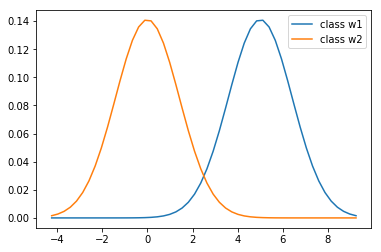

In [3]:
x = np.linspace(-3 * 2**0.5, 5 + 3 * 2**0.5)
plt.plot(x, gaussian_dist(x, 5, 2) * 0.5, label="class w1")
plt.plot(x, gaussian_dist(x, 0, 2) * 0.5, label="class w2")
plt.legend()
plt.savefig('T2_Fig')
plt.show()

## T3

/Users/pisit/Documents/projects/my-heart-will-go-on/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


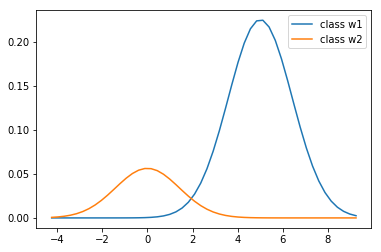

In [4]:
x = np.linspace(-3 * 2**0.5, 5 + 3 * 2**0.5)
plt.plot(x, gaussian_dist(x, 5, 2) * 0.8, label="class w1") # Happy Cat
plt.plot(x, gaussian_dist(x, 0, 2) * 0.2, label="class w2") # Sad Cat
plt.legend()
plt.savefig('T3_Fig')
plt.show()

## OT2

/Users/pisit/Documents/projects/my-heart-will-go-on/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


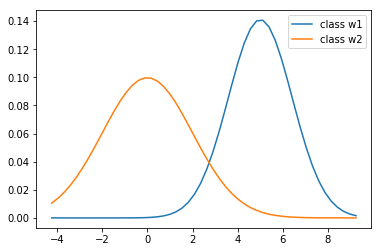

In [5]:
x = np.linspace(-3 * 2**0.5, 5 + 3 * 2**0.5)
plt.plot(x, gaussian_dist(x, 5, 2) * 0.5, label="class w1")
plt.plot(x, gaussian_dist(x, 0, 4) * 0.5, label="class w2")
plt.legend()
plt.savefig('OT2_Fig')
plt.show()

## T4

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm

In [7]:
dataframe = pd.read_csv('hr-employee-attrition-with-null.csv', index_col=0)

In [8]:
dataframe.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,2.072279,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,1.105828,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [9]:
dataframe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,2.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,4.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [10]:
dataframe.loc[dataframe['Attrition'] == 'No', 'Attrition'] = 0.0
dataframe.loc[dataframe['Attrition'] == 'Yes', 'Attrition'] = 1.0
for col in dataframe:
    if not np.issubdtype(dataframe[col], np.number):
        dataframe[col] = pd.Categorical(dataframe[col]).codes
dataframe = dataframe.drop(columns="EmployeeNumber")

In [11]:
dataframe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2,NaN,-1,1.0,NaN,1,1.0,2.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,0,-1,279.0,1,NaN,NaN,1,1.0,3.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,1,-1,1373.0,-1,2.0,2.0,-1,1.0,NaN,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,0,1,1392.0,1,3.0,4.0,1,NaN,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,0,2,591.0,1,2.0,1.0,3,1.0,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [12]:
dataframe.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1470.000000,1470.000000,1176.000000,1470.000000,1176.00000,1176.000000,1470.000000,1176.0,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,37.134354,0.161224,1.089116,798.875850,0.800680,9.37500,2.920918,1.608844,1.0,2.733844,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,9.190317,0.367863,1.200557,406.957684,1.016742,8.23049,1.028796,1.772662,0.0,1.092992,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,18.000000,0.000000,-1.000000,102.000000,-1.000000,1.00000,1.000000,-1.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,457.750000,1.000000,2.00000,2.000000,1.000000,1.0,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,798.500000,1.000000,7.00000,3.000000,1.000000,1.0,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1168.250000,1.000000,15.00000,4.000000,3.000000,1.0,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.00000,5.000000,5.000000,1.0,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [13]:
suffled = dataframe.sample(frac=1)
attrition_yes = suffled[suffled['Attrition'] == 1.0]
attrition_no = suffled[suffled['Attrition'] == 0.0]

In [14]:
sep_yes = int(np.floor(len(attrition_yes.index) * 0.9))
sep_no = int(np.floor(len(attrition_no.index) * 0.9))
train = pd.concat([attrition_yes.iloc[:sep_yes], attrition_no.iloc[:sep_no]])
test = pd.concat([attrition_yes.iloc[sep_yes:], attrition_no.iloc[sep_no:]])
train = train.sample(frac=1)
test = test.sample(frac=1)
train_cpy = train.copy()
test_cpy = test.copy()

In [15]:
train.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1052.000000,1322.00000,1322.000000,1058.000000,1322.000000,1053.000000,1055.000000,1322.000000,1060.0,1059.000000,...,1059.000000,1061.0,1049.000000,1054.000000,1054.000000,1056.000000,1055.000000,1058.000000,1056.000000,1054.000000
mean,37.132129,0.16112,1.093797,799.847826,0.811649,9.347578,2.915640,1.610439,1.0,2.738432,...,2.693107,80.0,0.755005,11.339658,2.777040,2.766098,7.045498,4.261815,2.153409,4.106262
std,9.140027,0.36778,1.199410,408.835183,1.009456,8.269969,1.034276,1.768249,0.0,1.094990,...,1.097884,0.0,0.825429,7.812645,1.286427,0.710934,6.051629,3.609941,3.125669,3.543797
min,18.000000,0.00000,-1.000000,102.000000,-1.000000,1.000000,1.000000,-1.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.00000,0.000000,447.250000,1.000000,2.000000,2.000000,1.000000,1.0,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.00000,2.000000,800.000000,1.000000,7.000000,3.000000,1.000000,1.0,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.00000,2.000000,1171.750000,1.000000,15.000000,4.000000,3.000000,1.0,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1.00000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [16]:
test.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,124.000000,148.000000,148.000000,118.000000,148.000000,123.000000,121.000000,148.000000,116.0,117.000000,...,117.000000,115.0,127.000000,122.000000,122.000000,120.000000,121.000000,118.000000,120.000000,122.000000
mean,37.153226,0.162162,1.047297,790.161017,0.702703,9.609756,2.966942,1.594595,1.0,2.692308,...,2.709402,80.0,0.732283,10.909836,2.877049,2.808333,7.256198,4.550847,2.208333,4.016393
std,9.644953,0.369851,1.214059,391.289802,1.078292,7.913087,0.982632,1.817668,0.0,1.078485,...,1.059113,0.0,0.801277,7.546007,1.327259,0.652028,6.780522,3.819870,3.492840,3.494940
min,19.000000,0.000000,-1.000000,117.000000,-1.000000,1.000000,1.000000,-1.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,480.750000,-0.250000,2.500000,2.000000,-0.250000,1.0,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.500000,0.000000,2.000000,778.500000,1.000000,8.000000,3.000000,2.000000,1.0,3.000000,...,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.250000,0.000000,2.000000,1129.500000,1.000000,14.500000,4.000000,3.000000,1.0,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,59.000000,1.000000,2.000000,1475.000000,2.000000,29.000000,5.000000,5.000000,1.0,4.000000,...,4.000000,80.0,3.000000,32.000000,6.000000,4.000000,32.000000,16.000000,15.000000,14.000000


In [17]:
def histogram(df: pd.DataFrame, col: str, bin_size: int):
    # remove NaN values
    df_col_no_nan = df[~np.isnan(df[col])][col]
    # hist is the count for each bin
    # bin_edge is the edge values of the bins
    hist, bin_edge = np.histogram(df_col_no_nan, bin_size)
    return hist, bin_edge

In [18]:
bin_zero_count = 0
def plot_histogram(df: pd.DataFrame, col: str, bin_size: int):
    hist, bin_edge = histogram(df, col, bin_size)
    global bin_zero_count
    bin_zero_count += len(hist[hist == 0])
    print(hist)
    # plot the histogram
    plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor='steelblue')
    plt.title(col)
    plt.show()

[13  5 11 13 10 18 19 24 30 34 47 40 48 42 40 60 51 52 39 41 71 31 32 26
 26 31 24 18 14 17 19 13 15 15 14 17  6  3 12 11]


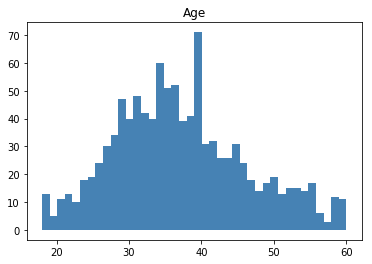

[263   0   0   0   0   0   0   0   0   0   0   0   0 105   0   0   0   0
   0   0   0   0   0   0   0   0 199   0   0   0   0   0   0   0   0   0
   0   0   0 755]


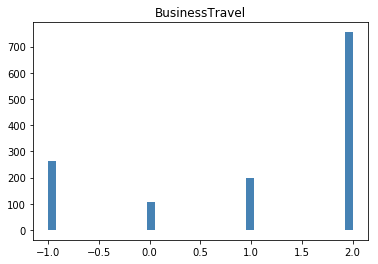

[29 35 25 24 21 27 32 22 20 31 28 23 33 34 29 21 28 31 16 20 32 16 27 25
 23 37 15 17 28 29 31 27 32 27 30 26 33 26 21 27]


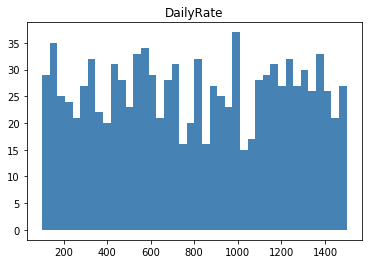

[257   0   0   0   0   0   0   0   0   0   0   0   0  50   0   0   0   0
   0   0   0   0   0   0   0   0 700   0   0   0   0   0   0   0   0   0
   0   0   0 315]


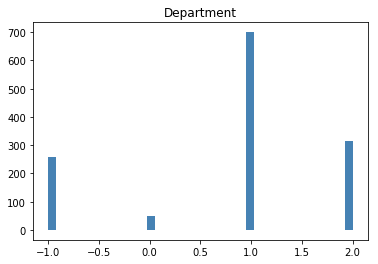

[151 145  62   0  46  50   0  41  60   0  56  57  61   0  20  16   0  10
  12   0  19  25  14   0  18  15   0  18  14   0  13  19  25   0  20  18
   0   8  18  22]


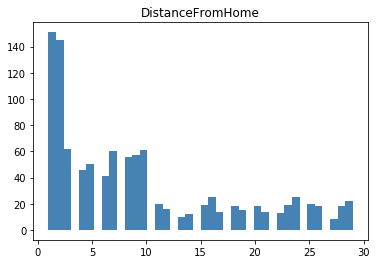

[124   0   0   0   0   0   0   0   0   0 201   0   0   0   0   0   0   0
   0   0 409   0   0   0   0   0   0   0   0   0 282   0   0   0   0   0
   0   0   0  39]


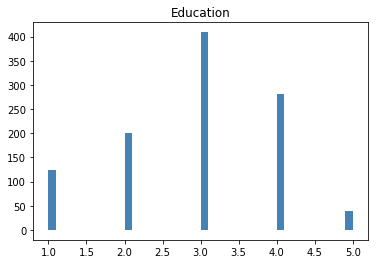

[257   0   0   0   0   0  21   0   0   0   0   0   0 450   0   0   0   0
   0   0 111   0   0   0   0   0 321   0   0   0   0   0   0  59   0   0
   0   0   0 103]


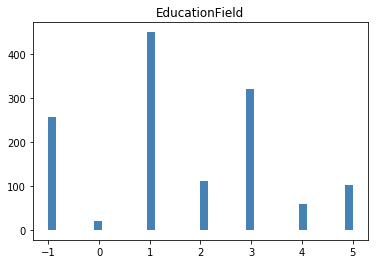

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0 1060    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


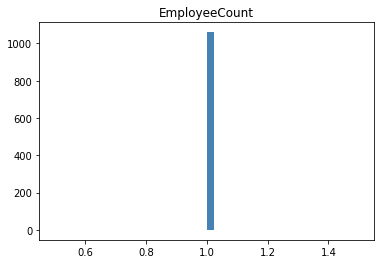

[205   0   0   0   0   0   0   0   0   0   0   0   0 194   0   0   0   0
   0   0   0   0   0   0   0   0 333   0   0   0   0   0   0   0   0   0
   0   0   0 327]


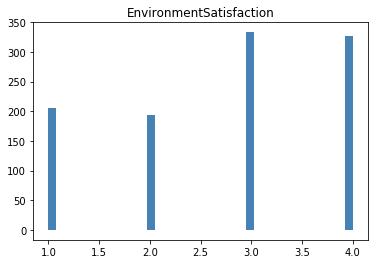

[270   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 431   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 621]


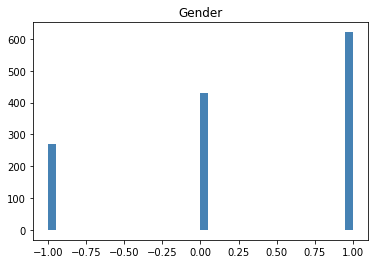

[23 32 20 15 24 22 36 18 30 31 31 13 35 32 28 22 29 34 29 17 35 25 28 13
 32 30 27 15 36 28 35 11 38 25 27 18 25 32 36 25]


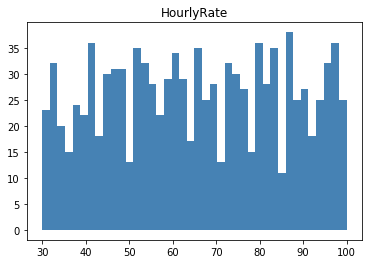

[ 51   0   0   0   0   0   0   0   0   0   0   0   0 279   0   0   0   0
   0   0   0   0   0   0   0   0 621   0   0   0   0   0   0   0   0   0
   0   0   0 106]


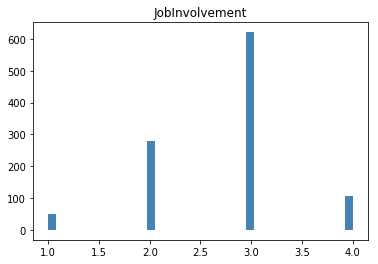

[393   0   0   0   0   0   0   0   0   0 374   0   0   0   0   0   0   0
   0   0 162   0   0   0   0   0   0   0   0   0  81   0   0   0   0   0
   0   0   0  45]


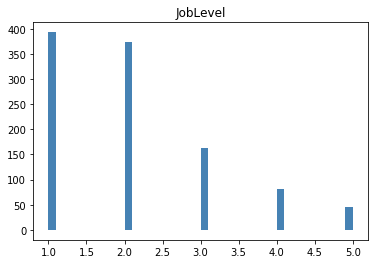

[265   0   0   0  99   0   0   0  38   0   0   0   0 184   0   0   0  69
   0   0   0   0 105   0   0   0  57   0   0   0   0 212   0   0   0 227
   0   0   0  66]


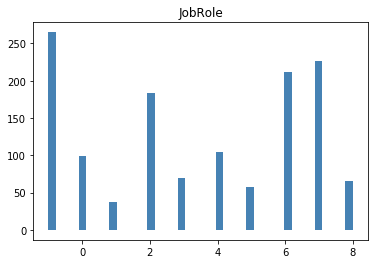

[195   0   0   0   0   0   0   0   0   0   0   0   0 197   0   0   0   0
   0   0   0   0   0   0   0   0 318   0   0   0   0   0   0   0   0   0
   0   0   0 349]


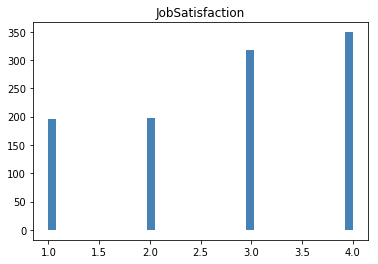

[265   0   0   0   0   0   0   0   0   0   0   0   0 232   0   0   0   0
   0   0   0   0   0   0   0   0 483   0   0   0   0   0   0   0   0   0
   0   0   0 342]


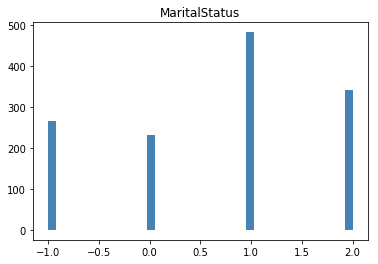

[ 13  13 120 119  65  57  66  68  59  56  37  47  36  19  19  17  15   7
  24  21  26  10   7   9   1  10  15  10   0   3   3   5   7  12  10   9
   8   4  17  17]


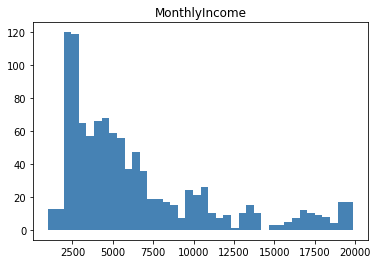

[26 27 23 28 27 37 30 23 29 21 29 28 33 28 21 27 26 21 31 24 19 31 35 26
 27 29 22 24 31 26 26 25 34 31 21 24 23 23 21 15]


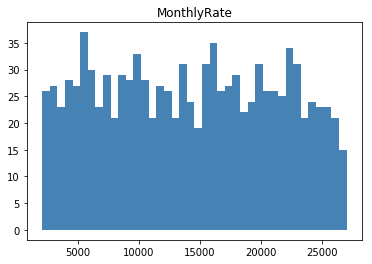

[142   0   0   0 364   0   0   0 110   0   0   0   0 119   0   0   0 100
   0   0   0   0  47   0   0   0  49   0   0   0   0  50   0   0   0  34
   0   0   0  43]


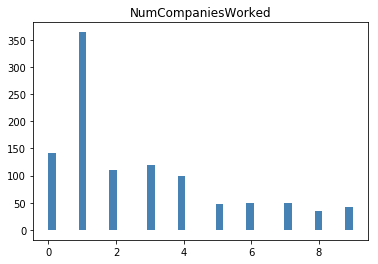

[ 278    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1044]


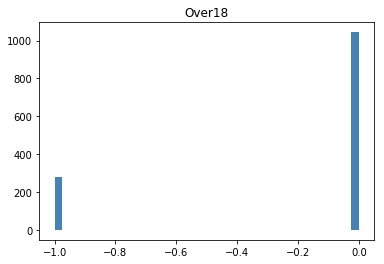

[267   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 757   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 298]


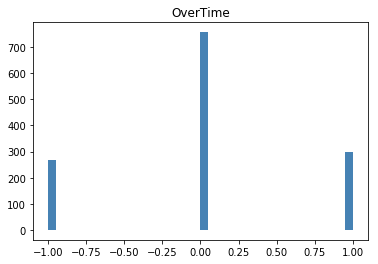

[158   0 138   0   0 160   0   0 149   0   0  69   0   0  55   0   0  62
   0   0  64   0  52   0   0  37   0   0  35   0   0  34   0   0  24   0
   0  16   0  10]


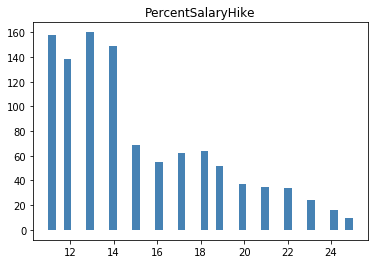

[901   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 152]


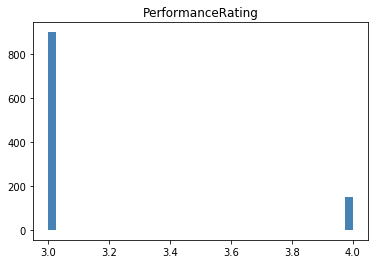

[210   0   0   0   0   0   0   0   0   0   0   0   0 220   0   0   0   0
   0   0   0   0   0   0   0   0 314   0   0   0   0   0   0   0   0   0
   0   0   0 315]


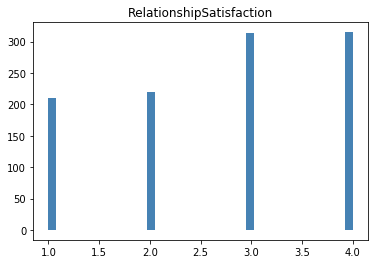

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0 1061    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


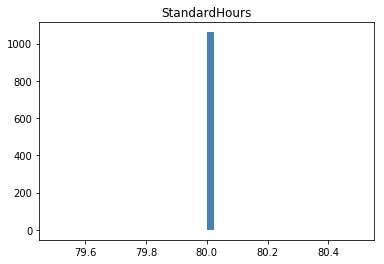

[464   0   0   0   0   0   0   0   0   0   0   0   0 431   0   0   0   0
   0   0   0   0   0   0   0   0 101   0   0   0   0   0   0   0   0   0
   0   0   0  53]


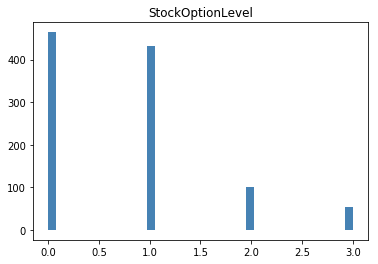

[  6  54  19  31  48  62  89  62  81  66 146  26  37  22  22  27  25  27
  24  12  18  24  14  17  14   8  12   2  12   5   5   7   7   6   4   3
   5   3   0   2]


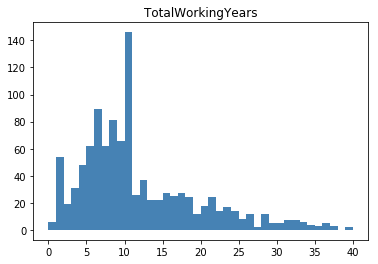

[ 41   0   0   0   0   0  55   0   0   0   0   0   0 394   0   0   0   0
   0   0 342   0   0   0   0   0  92   0   0   0   0   0   0  90   0   0
   0   0   0  40]


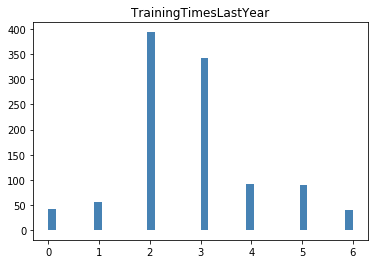

[ 57   0   0   0   0   0   0   0   0   0   0   0   0 248   0   0   0   0
   0   0   0   0   0   0   0   0 636   0   0   0   0   0   0   0   0   0
   0   0   0 115]


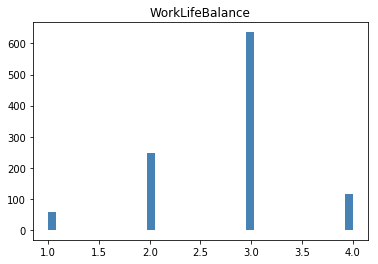

[ 30 122  85  90  82 144  51  64  56  56 100  21  11   0  17  16  14  10
   6   9   6  15  12  13   2   6   0   1   2   1   0   2   0   1   1   5
   1   0   2   1]


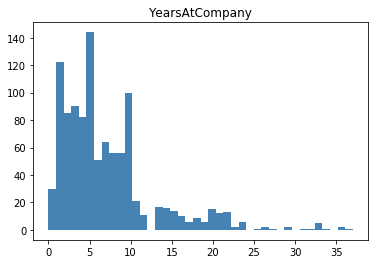

[176   0  38   0 267   0  97   0  67   0   0  28   0  25   0 165   0  67
   0   0  52   0  26   0  13   0   6   0   9   0   0   7   0   7   0   4
   0   2   0   2]


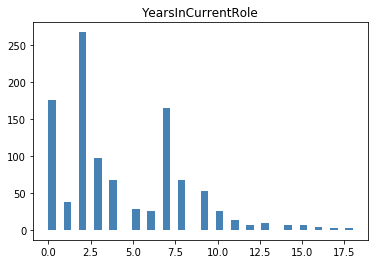

[411   0 261   0   0 117   0   0  41   0  39   0   0  30   0   0  28   0
  60   0   0  12   0   0  11   0   5   0   0  16   0   0   7   0   4   0
   0   5   0   9]


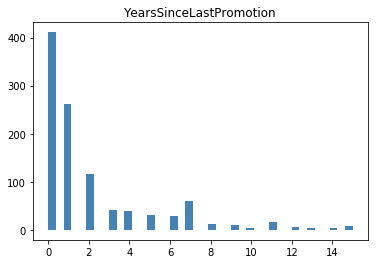

[191   0  52   0 250   0   0 104   0  64   0  19   0   0  20   0 160   0
  78   0   0  44   0  24   0  15   0   0  12   0   9   0   2   0   0   5
   0   1   0   4]


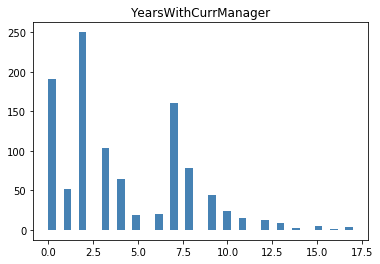

In [19]:
for col in train:
    if col == "Attrition":
        continue
    plot_histogram(train, col, bin_size=40)

## T5

In [20]:
bin_zero_count

858

## T6

[ 42  71 151 190 183 160  99  63  61  32]


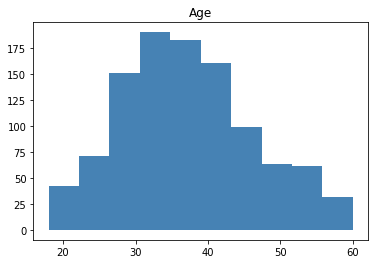

[265 256 199  91  67  52  36  11  38  46]


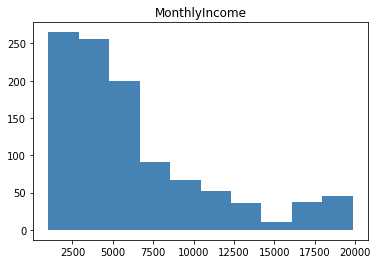

[358 137 173  97  22  58  51  46  63  48]


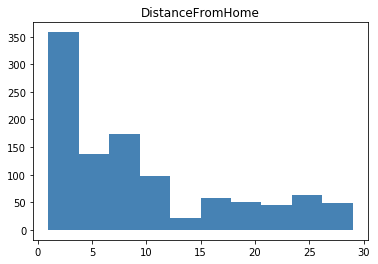

In [21]:
# Bin size = 10
for col in ('Age', 'MonthlyIncome', 'DistanceFromHome'):
    plot_histogram(train, col, bin_size=10)

[13  5 11 13 10 18 19 24 30 34 47 40 48 42 40 60 51 52 39 41 71 31 32 26
 26 31 24 18 14 17 19 13 15 15 14 17  6  3 12 11]


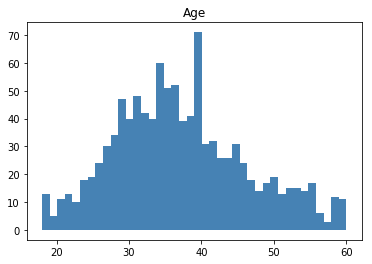

[ 13  13 120 119  65  57  66  68  59  56  37  47  36  19  19  17  15   7
  24  21  26  10   7   9   1  10  15  10   0   3   3   5   7  12  10   9
   8   4  17  17]


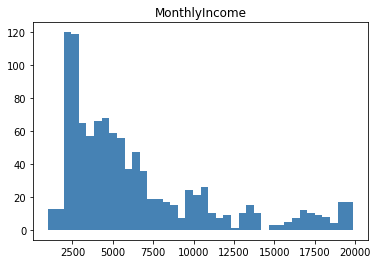

[151 145  62   0  46  50   0  41  60   0  56  57  61   0  20  16   0  10
  12   0  19  25  14   0  18  15   0  18  14   0  13  19  25   0  20  18
   0   8  18  22]


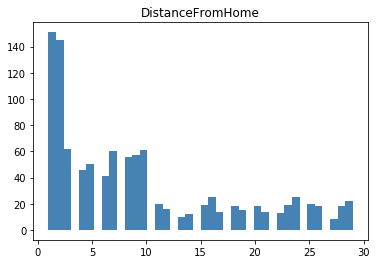

In [22]:
# Bin size = 40
for col in ('Age', 'MonthlyIncome', 'DistanceFromHome'):
    plot_histogram(train, col, bin_size=40)

[ 6  0  7  0  5  0  0 11  0 13  0 10  0  0 18  0 19  0  0 24  0 30  0 34
  0  0 47  0 40  0 48  0  0 42  0 40  0  0 60  0 51  0 52  0  0 39  0 41
  0  0 34  0 37  0 31  0  0 32  0 26  0 26  0  0 31  0 24  0  0 18  0 14
  0 17  0  0 19  0 13  0 15  0  0 15  0 14  0  0 17  0  6  0  3  0  0 12
  0  6  0  5]


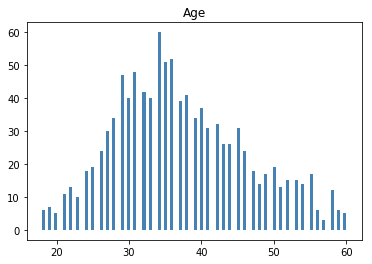

[ 5  6  7  4  4 38 44 60 48 49 37 16 26 22 21 22 27 31 24 30 22 22 30 26
 15 14 14 18 20 18 24 10  4  7 10  8  8  6  5  9  8  3  4  2  5  9 10 10
  5 11 12  8 11  3  2  3  3  4  4  2  1  0  1  1  8  3  9  8  3  2  0  0
  1  2  0  1  2  0  1  4  2  4  5  5  3  6  2  3  5  3  2  5  1  2  2  7
  9  5  8  5]


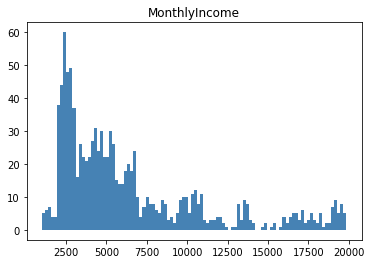

[151   0   0 145   0   0   0  62   0   0  46   0   0   0  50   0   0  41
   0   0   0  60   0   0   0  56   0   0  57   0   0   0  61   0   0  20
   0   0   0  16   0   0  10   0   0   0  12   0   0  19   0   0   0  25
   0   0   0  14   0   0  18   0   0   0  15   0   0  18   0   0   0  14
   0   0  13   0   0   0  19   0   0   0  25   0   0  20   0   0   0  18
   0   0   8   0   0   0  18   0   0  22]


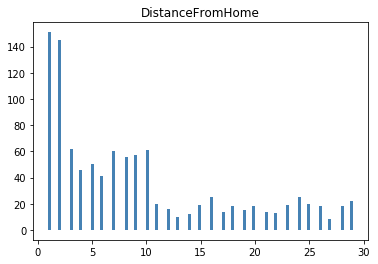

In [23]:
# Bin size = 100
for col in ('Age', 'MonthlyIncome', 'DistanceFromHome'):
    plot_histogram(train, col, bin_size=100)

## T7

In [24]:
bin_edges = {}
def bin_column(df: pd.DataFrame, col: str, bin_size: int = 10):
    hist, bin_edge = histogram(df, col, bin_size)
    global bin_edges
    bin_edge = bin_edge[:-1]
    bin_edges[col] = bin_edge
    df.loc[~np.isnan(df[col]), col] = np.digitize(df[~np.isnan(df[col])][col], bin_edge)

[ 42  71 151 190 183 160  99  63  61  32]


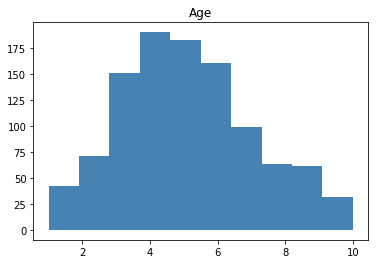

[18.  22.2 26.4 30.6 34.8 39.  43.2 47.4 51.6 55.8]


In [25]:
bin_column(train, 'Age', 10)
bin_column(train, 'MonthlyIncome', 40)
bin_column(train, 'DistanceFromHome', 10)
plot_histogram(train, 'Age', 10)
print(bin_edges['Age'])

In [26]:
for col in ["DailyRate", "EmployeeCount", "HourlyRate", "MonthlyRate", "TotalWorkingYears", "YearsAtCompany"]:
    bin_column(train, col)

In [27]:
train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1159,6.0,0,1,5.0,1,2.0,NaN,3,NaN,1.0,...,NaN,80.0,0.0,3.0,2.0,NaN,3.0,NaN,3.0,NaN
330,6.0,0,1,4.0,1,4.0,4.0,1,6.0,3.0,...,2.0,80.0,1.0,3.0,3.0,4.0,3.0,7.0,0.0,NaN
609,6.0,0,2,4.0,1,5.0,2.0,1,6.0,2.0,...,3.0,80.0,1.0,6.0,3.0,NaN,2.0,1.0,1.0,0.0
824,6.0,0,2,1.0,1,10.0,3.0,3,NaN,2.0,...,1.0,80.0,0.0,NaN,NaN,3.0,1.0,0.0,0.0,0.0
1289,5.0,0,0,9.0,0,1.0,3.0,0,6.0,1.0,...,4.0,80.0,3.0,4.0,3.0,3.0,3.0,10.0,3.0,NaN
267,2.0,0,-1,5.0,1,2.0,2.0,1,6.0,NaN,...,4.0,80.0,2.0,2.0,2.0,3.0,NaN,3.0,1.0,5.0
1121,NaN,0,-1,6.0,2,1.0,4.0,1,6.0,NaN,...,1.0,80.0,NaN,4.0,5.0,3.0,1.0,0.0,0.0,0.0
951,6.0,0,-1,NaN,2,4.0,2.0,-1,NaN,NaN,...,NaN,80.0,NaN,NaN,4.0,3.0,6.0,2.0,11.0,9.0
523,8.0,0,2,8.0,1,10.0,1.0,-1,6.0,4.0,...,NaN,80.0,NaN,NaN,NaN,3.0,6.0,8.0,3.0,8.0
436,4.0,1,2,4.0,1,4.0,1.0,3,6.0,1.0,...,1.0,NaN,3.0,3.0,2.0,NaN,2.0,3.0,1.0,NaN
